In [1]:
import numpy as np
from pathlib import Path
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav


In [2]:
# convert fft pcm to wav
# import glob
# from src.audio import convert_pcm_to_wav

# pcm_path = "./test/result/Hifi2-mini-vs-CMSIS/Hifi2-mini/fft"
# pcm_path = Path(pcm_path)
# pcm_path_list = glob.glob((pcm_path/"*.pcm").as_posix(), recursive=True)

# root = Path(".")
# for pcm_path in pcm_path_list:
#     wav_path = root / (pcm_path.split(".")[0]+".wav")
#     path = root / pcm_path
#     print(path, ">>", wav_path)
#     convert_pcm_to_wav(pcm_path=path, wav_path=wav_path, sample_rate=44100, channel=1, bit_depth=32)

(25800,) int32 (25800,) int32


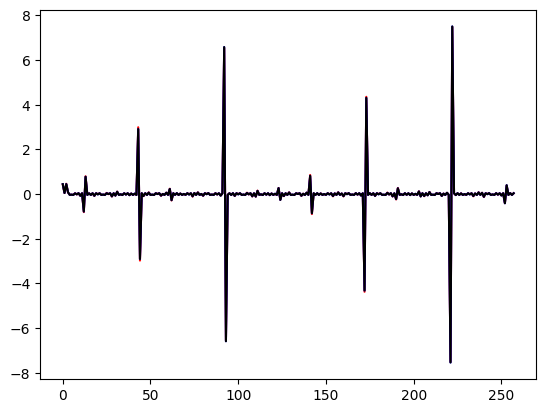

In [7]:
# read fft in wav
sr, fft_hifi2 = wav.read("./test/result/Hifi2-mini-vs-CMSIS/Hifi2-mini/fft/out_Hifi2_FFT_Int32_100Frame_win_sin_1k_stereo_tone_16bit_400ms_-40dBFS.wav")
data_int32 = np.load("./test/result/Hifi2-mini-vs-CMSIS/CMSIS/fft/out_FFT_Int32_100Frame_win_sin_1k_stereo_tone_16bit_400ms_-40dBFS.npy")
data_float32 = np.load("./test/result/Hifi2-mini-vs-CMSIS/CMSIS/fft/out_FFT_Float_100Frame_win_sin_1k_stereo_tone_16bit_400ms_-40dBFS.npy")

# sr, fft_hifi2 = wav.read("./test/result/Hifi2-mini-vs-CMSIS/Hifi2-mini/fft/out_Hifi2_FFT_Int32_100Frame_win_WhiteNoise_Full_-40_dBFS_44k_PCM16_LR.wav")
# data_int32 = np.load("./test/result/Hifi2-mini-vs-CMSIS/CMSIS/fft/out_FFT_Int32_100Frame_win_WhiteNoise_Full_-40_dBFS_44k_PCM16_LR.npy")
# data_float32 = np.load("./test/result/Hifi2-mini-vs-CMSIS/CMSIS/fft/out_FFT_Float_100Frame_win_WhiteNoise_Full_-40_dBFS_44k_PCM16_LR.npy")

print(fft_hifi2.shape, fft_hifi2.dtype, data_int32.shape, data_int32.dtype)

fft_hifi2 = fft_hifi2.astype(np.float32)
data_int32 = data_int32.astype(np.float32)

fft_hifi2 /= 2**31
data_int32 /= 2**8

fft_hifi2 = fft_hifi2.reshape((258, 100))
data_int32 = data_int32.reshape((258, 100))
data_float32 = data_float32.reshape((258, 100))

fft_hifi2 = np.mean(fft_hifi2, axis=-1)
data_int32 = np.mean(data_int32, axis=-1)
data_float32 = np.mean(data_float32, axis=-1)

eps = 1e-10

# fft_hifi2[0::2] = (fft_hifi2[0::2] - np.min(fft_hifi2[0::2])) / (np.max(fft_hifi2[0::2]) - np.min(fft_hifi2[0::2]))
# fft_hifi2[1::2] = (fft_hifi2[1::2] - np.min(fft_hifi2[1::2])) / (np.max(fft_hifi2[1::2]) - np.min(fft_hifi2[1::2]))

# data_int32[0::2]= (data_int32[0::2] - np.min(data_int32[0::2])) / (np.max(data_int32[0::2]) - np.min(data_int32[0::2]))
# data_int32[1::2]= (data_int32[1::2] - np.min(data_int32[1::2])) / (np.max(data_int32[1::2]) - np.min(data_int32[1::2]))

fft_hifi2[0::2] = (fft_hifi2[0::2] - np.mean(fft_hifi2[0::2])) / (np.std(fft_hifi2[0::2]) + eps)
fft_hifi2[1::2] = (fft_hifi2[1::2] - np.mean(fft_hifi2[1::2])) / (np.std(fft_hifi2[1::2]) + eps)

data_int32[0::2]= (data_int32[0::2] - np.mean(data_int32[0::2])) / (np.std(data_int32[0::2]) + eps)
data_int32[1::2]= (data_int32[1::2] - np.mean(data_int32[1::2])) / (np.std(data_int32[1::2]) + eps)

data_float32[0::2]= (data_float32[0::2] - np.mean(data_float32[0::2])) / (np.std(data_float32[0::2]) + eps)
data_float32[1::2]= (data_float32[1::2] - np.mean(data_float32[1::2])) / (np.std(data_float32[1::2]) + eps)

import matplotlib.pyplot as plt
plt.plot(fft_hifi2, 'r')
plt.plot(data_int32, 'b')
plt.plot(data_float32, "k")

In [4]:

print(np.max(np.abs(fft_hifi2-data_int32)), np.max(np.abs(fft_hifi2)), np.max(np.abs(data_int32)))
print(np.max(np.abs(fft_hifi2-data_float32)), np.max(np.abs(fft_hifi2)), np.max(np.abs(data_float32)))
print(np.max(np.abs(data_float32-data_int32)), np.max(np.abs(data_float32)), np.max(np.abs(data_int32)))

0.081392765 7.505322 7.535832
0.08139775432961782 7.505322 7.535849528974135
0.00010523029742256121 7.535849528974135 7.535832


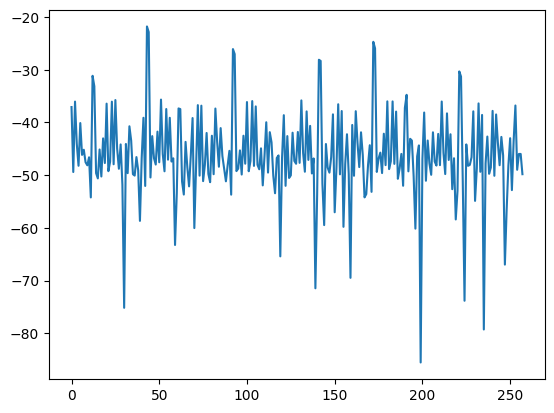

In [5]:
plt.plot(20*np.log10(np.abs(fft_hifi2-data_int32)))


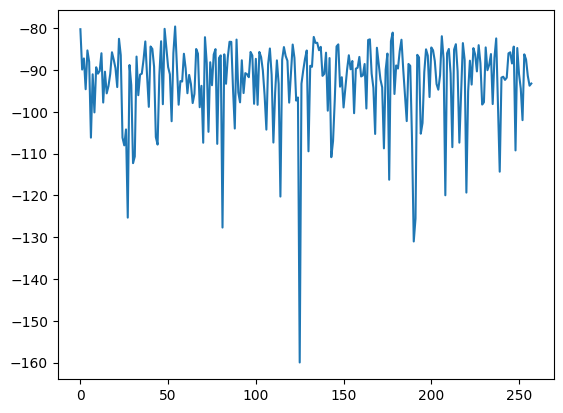

In [6]:
plt.plot(20*np.log10(np.abs(data_float32-data_int32)))
